#Aleksas Murauskas 260718389 ECSE 415
## Assignment 1 Part 1: Thresholding



1.Threshold the image at three different thresholds 1) 45 2) 90 and 3) 160
using simple binary thresholding as defined above. Display thresholded
images at these thresholds.

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return convert(image, np.uint8, force_copy)


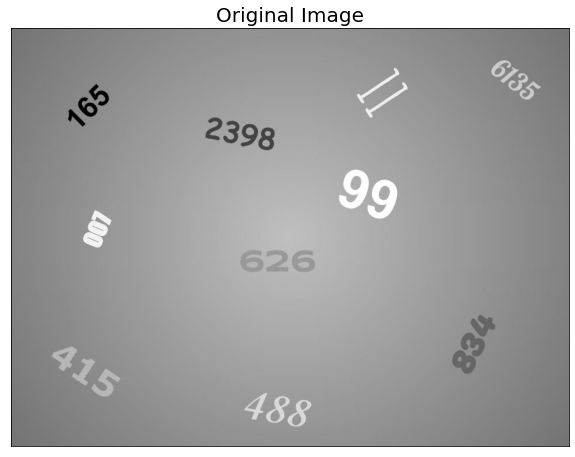

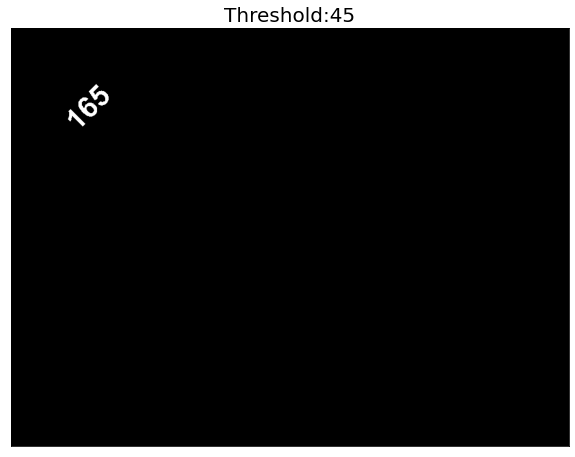

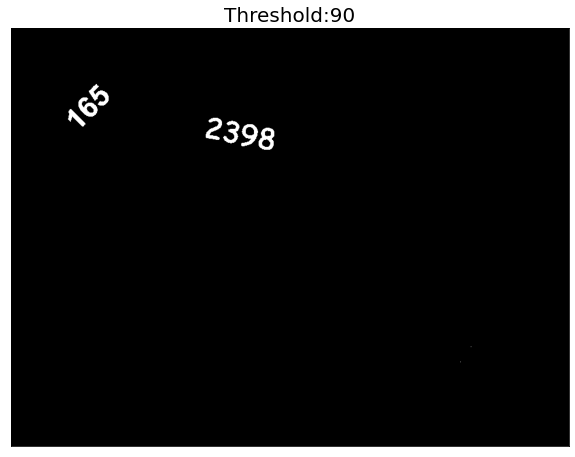

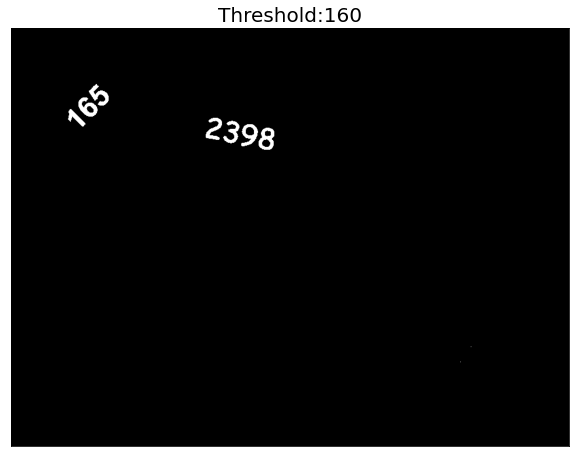

In [1]:
# Import all needed Libraries 
import cv2,math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
from skimage.util import img_as_ubyte

#Display Results Method 
def display_img(image, title_input):
    plt.figure(figsize = (10, 10))
    plt.imshow(image)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.title(title_input, fontsize = 20)

#Create path for images 
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/ECSE 415/Assignment-1/'

#Gather Image from File
img_path= drive_path+'images/numbers.jpg'
base_img = cv2.imread(img_path)

#Activate threshold on the image at 45,90,160 
bin_data = np.where(base_img>45,0,255)
img1= img_as_ubyte(bin_data)
bin_data = np.where(base_img>90,0,255)
img2= img_as_ubyte(bin_data)
bin_data = np.where(base_img>160,0,255)
img3= img_as_ubyte(bin_data)

#Threshhold function checked against offical cv2 function 
#ret,img1 = cv2.threshold(base_img, 45,225, cv2.THRESH_TRUNC)
#ret,img2 = cv2.threshold(base_img, 90,225, cv2.THRESH_TRUNC)
#ret,img3 = cv2.threshold(base_img, 160,225, cv2.THRESH_TRUNC)

display_img(base_img,'Original Image')
display_img(img1,'Threshold:45')
display_img(img2,'Threshold:90')
display_img(img2,'Threshold:160')

2. Write your observations about thresholded images at different thresholds.
How many and which numbers are segmented at each threshold? Note: A
number is considered as segmented if all digits of that number are clearly
visible as foreground or background in the thresholded image. What else
do you observe at each threshold?

>Threshold Value: 45   
Visible Numbers: Only One, 165

>Threshold Value: 90  
Visible Numbers: Only two, 165 and 2398

>Threshold Value: 160   
>Visible Numbers: Only two, 165 and 2398

>This was checked against the proper cv2.threshold method, and the same values were found. 





3. Threshold the image using Window binary thresholding using three dier-
ent ranges of thresholds. 1) T1=55 and T2=110, 2) T1=110 and T2=160,
3) T1=55 and T2=160. Write your observations. Display images at these
dierent thresholds. How many and which numbers are segmented at each
threshold?

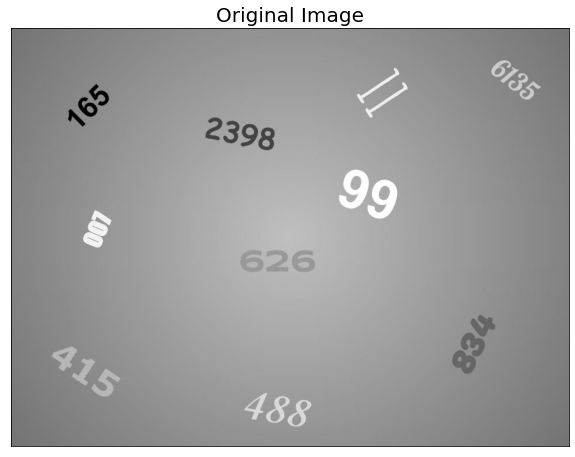

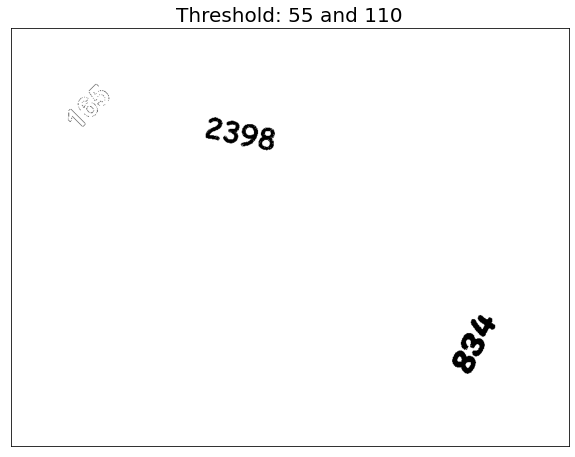

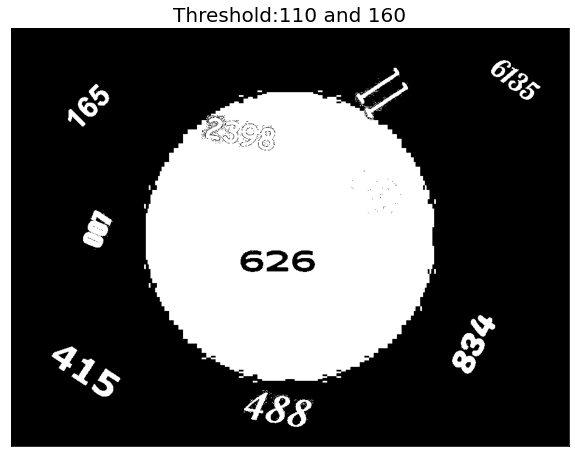

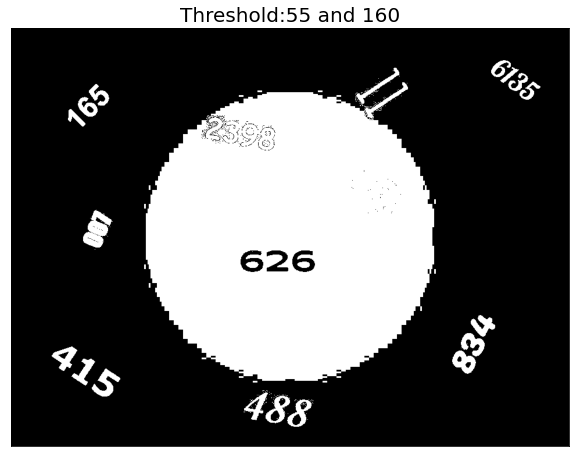

In [2]:
#Define Threshold Function  
def thresholdWindow(data, low, high):
  return ((low<data)&(data<high))

#Run threshold function on given thresholds 
img1 = np.where(thresholdWindow(base_img, 55, 110),0,255)
img2 = np.where(thresholdWindow(base_img, 110, 160),0,255)
img3 = np.where(thresholdWindow(base_img, 55, 160),0,255)

display_img(base_img,'Original Image')
display_img(img1,'Threshold: 55 and 110')
display_img(img2,'Threshold:110 and 160')
display_img(img2,'Threshold:55 and 160')

Above are the results of the three window thresholds:

>Threshold Value: 55 to 110
>Visible Numbers: 3 total; 834,165,2398

>Threshold Value: 110 to 160
>Visible Numbers: 9 total; 165, 2398, 11, 6135, 007, 626, 415, 488, 834

Threshold Value: 55 to 160 
Visible Numbers: 9 total; 165, 2398, 11, 6135, 007, 626, 415, 488, 834



4. In a practical application, we vary the value of the hyper-parameters (here,
the threshold values) for any of the above-mentioned thresholding meth-
ods, such that we get the desired output. Find a threshold value such
that only numbers "007", "11", and "99" are segmented (i.e. considered
as foreground - white pixel - 255 value). See Figure 1(b). Report your
finding and display corresponding thresholded images for at least three
dierent threshold values, and write how it helped you in narrowing down
the desired hyper-parameter value. Note that the emphasis in to not get
the exact output but to explore different hyper-parameters and report
your finding.

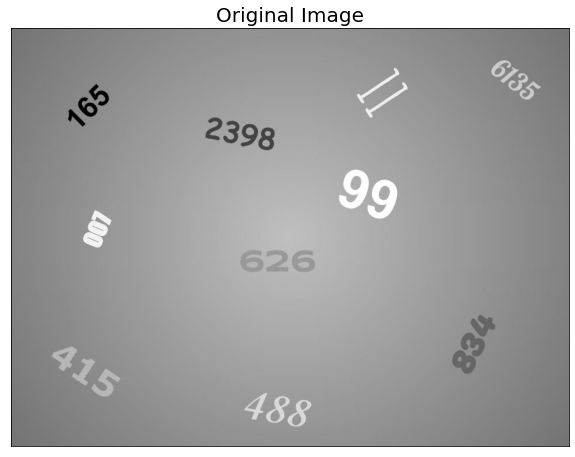

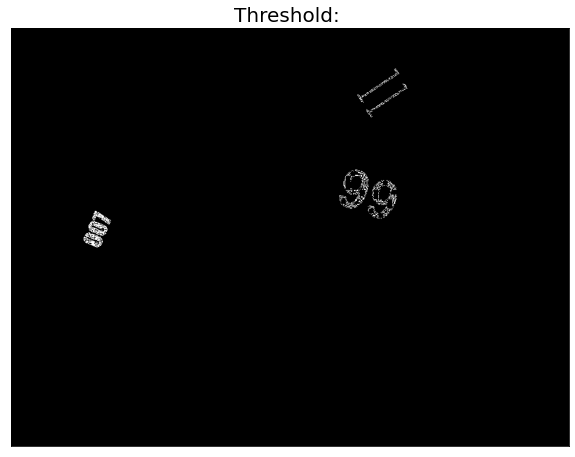

In [3]:
#Run threshold Window to hone in on the window where the desired number is visible 
img1 = np.where(thresholdWindow(base_img, 240, 255),255,0)

display_img(base_img,'Original Image')
display_img(img1,'Threshold: ')

Use window thresholding to iteratively close in on a threshold that will only show the desried numbers. Close the gap until the values are found. 

Test 1: Window between 200 and 255
>Result: 488, 99, 007, 11, 6135

Test 2: Window between 220 and 255
>Result: 488, 007,11, 99

Test 2: Window between 230 and 255
>Result:  007,11, 99

Test 2: Window between 235 and 250
>Result:  007,11, 99

The result is between 230 and 255. 

Closed in to 240 and 255, Seems to be best at 245

# Assignment 1 Part 2: Denoising 


1. Filter the noisy image using a 3x3 Gaussian filter with variance equal to Display filtered image along with original image.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


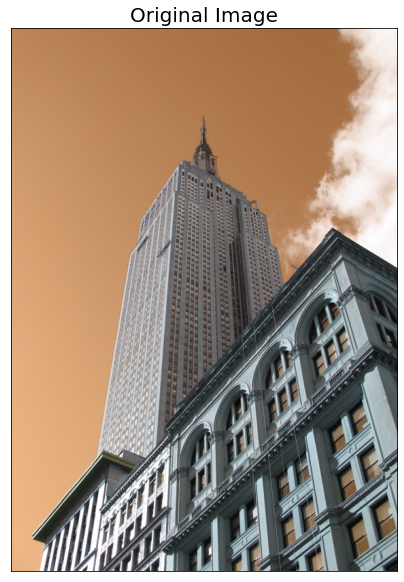

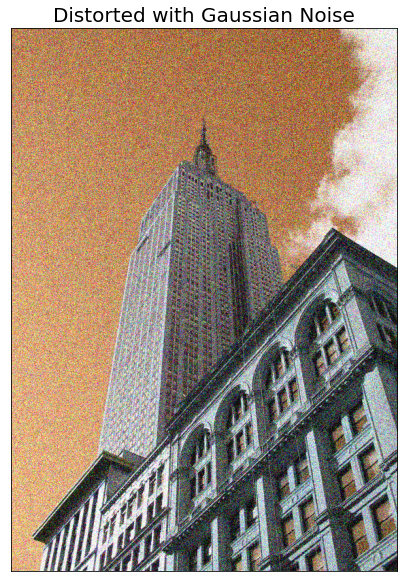

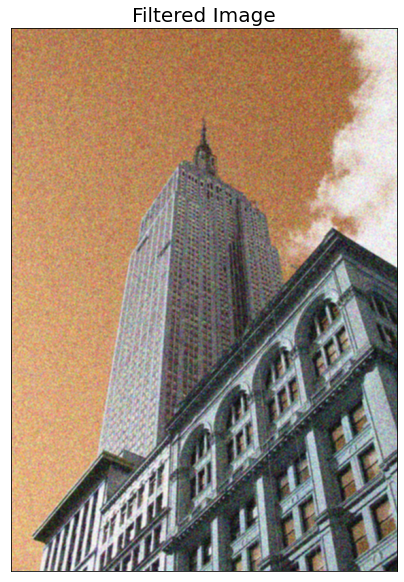

In [4]:
import numpy as np
import cv2, math
import matplotlib.pyplot as plt
from skimage.measure import compare_psnr
from google.colab import drive
from scipy import signal
from scipy import misc

#Obtained from Tutorial 3
def gaussian_kernel(size, sigma):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/ECSE 415/Assignment-1/'

#Gather Images from File
img_path= drive_path+'images/Tower.png'
base_img = cv2.imread(img_path)
img_path= drive_path+'images/Tower_Gauss_Noise.png'
base_GN_img = cv2.imread(img_path)


kernel = gaussian_kernel(3,2)
#gauss_img = cv2.filter2D(base_GN_img, cv2.CV_64F, kernel)

#Expected Output
gauss_img = cv2.GaussianBlur(base_GN_img, (3,3), math.sqrt(2))

display_img(base_img,'Original Image')
display_img(base_GN_img,'Distorted with Gaussian Noise')
display_img(gauss_img,'Filtered Image')

2. Filter the noisy image using a box filter of the same size. Display filtered
image along with original image.

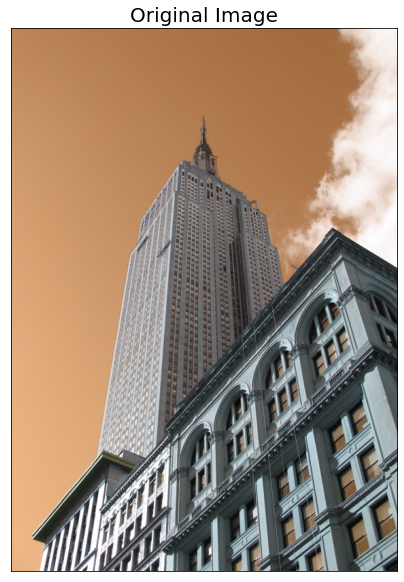

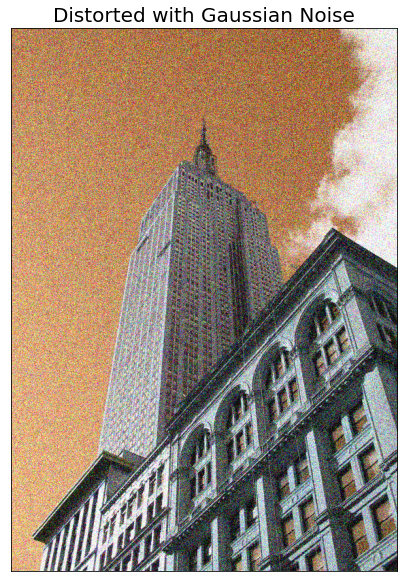

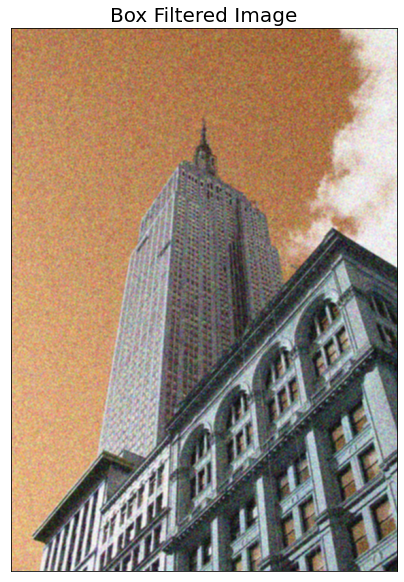

In [5]:
#Create Box Filter full of ones 
kernel =np.ones((3,3), dtype=np.float32)
#Add Scalar value to kernel 
kernel = kernel/9

#Expected Result
box_img = cv2.filter2D(base_GN_img, -1,kernel)

#Print result 
display_img(base_img,'Original Image')
display_img(base_GN_img,'Distorted with Gaussian Noise')
display_img(box_img,'Box Filtered Image')

3. Compare the Peak-Signal-to-Noise-Ratio (PSNR) of both of the denoised
images to that of the clean image and state which method gives the superior result. Use the PSNR function provided by opencv/scikit-image.

In [6]:
#Find PSNR Values
gauss_psnr = compare_psnr(base_img, gauss_img)
box_psnr = compare_psnr(base_img, box_img)
print('PSNR of the Gaussian Filtered result:', gauss_psnr)
print('PSNR of the Box result:', box_psnr)

PSNR of the Gaussian Filtered result: 23.518830652488766
PSNR of the Box result: 23.36867705752252


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


>The Gaussian filter performed with a higher PSNR value. Therefore the Gaussian filter provides a result closer to the original image, and is the prefferable filtering method in this instance. 

4. Filter the noisy image using the same Gaussian filter as used in the previous question. Display filtered image along with original image.

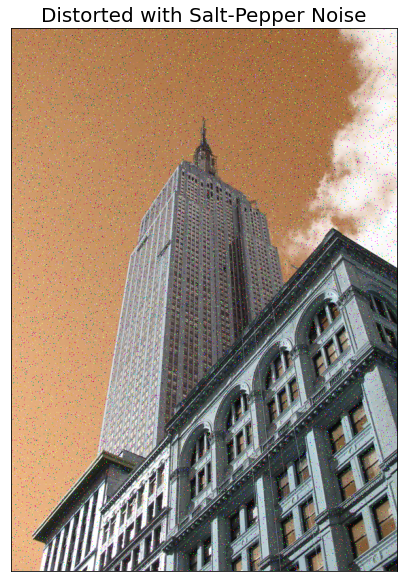

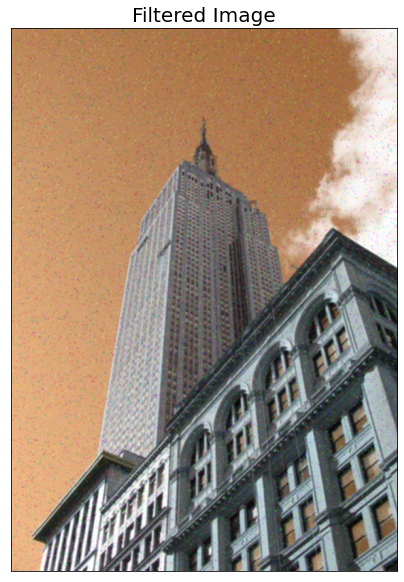

In [7]:
img_path= drive_path+'images/Tower_Salt_and_Pepper_Noise.png'
base_SP_img = cv2.imread(img_path)
kernel = gaussian_kernel(3,2)

#Expected Output: Not intended to be used
#gauss_SP_img = cv2.filter2D(base_SP_img, cv2.CV_64F, kernel)

gauss_SP_img = cv2.GaussianBlur(base_SP_img, (3,3), math.sqrt(2))

display_img(base_SP_img,'Distorted with Salt-Pepper Noise')
display_img(gauss_SP_img,'Filtered Image')

5. Filter the noisy image using a median filter of the same size. Display
filtered image along with original image.

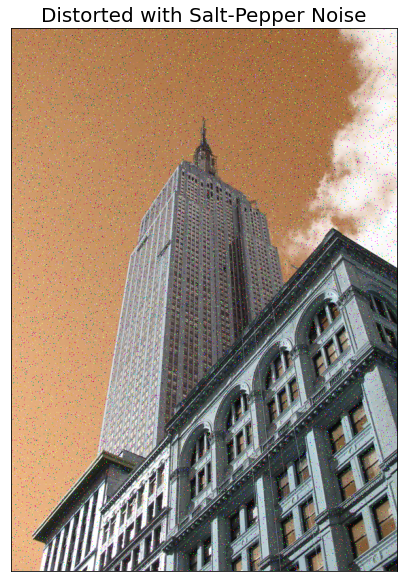

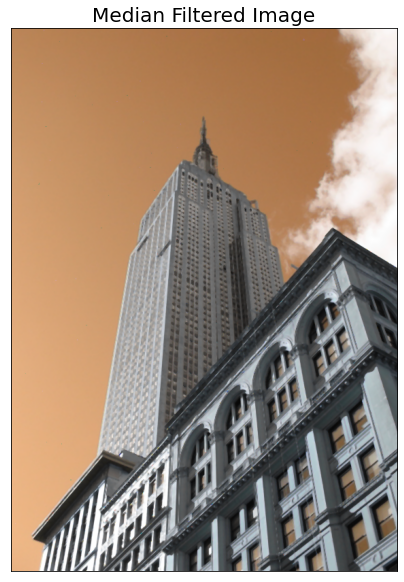

In [8]:
#Expected Output: Not intended to be used
from scipy import ndimage, misc

#Run median filter 
med_SP_img=ndimage.median_filter(base_SP_img, size=3)

#Expected Result
#med_SP_img = cv2.medianBlur(base_SP_img,3)

#Display Images 
display_img(base_SP_img,'Distorted with Salt-Pepper Noise')
display_img(med_SP_img,'Median Filtered Image')

6. Compare the PSNR of both of the denoised images to that of the clean im-
age and state which method gives a better result. Use the PSNR function given. 

In [9]:
#Find PSNR Values
gauss_psnr = compare_psnr(base_img, gauss_SP_img)
med_psnr = compare_psnr(base_img, med_SP_img)
print('PSNR of the Gaussian Filtered result:', gauss_psnr)
print('PSNR of the Median Filtered result:', med_psnr)

PSNR of the Gaussian Filtered result: 25.888049196395542
PSNR of the Median Filtered result: 28.834698208020395


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


>The Medium Filter performed with a higher PSNR value. Therefore the median filter provides a result closer to the original image, and is the prefferable filtering method in this instance. This is because Salt and pepper noise occurs as random very high or very low values, which occur at the far ends of the median filter, and are therefore ignored, while Gaussian must still take the noise into account. 

# Assignment 1 Part 3: Sobel Edge Detector 

*   Apply a Sobel edge detector with the kernel size of 3x3, 5x5 and 7x7 to
the image. Threshold the filtered image to detect edges. Use two values
of thresholds: 10% and 20% of the maximum pixel value (magnitude) of the filtered image. Display phase, magnitude, and thresholded images for
different kernel sizes and different thresholds.

In [10]:
import cv2,math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
from skimage.util import img_as_ubyte

img_path= drive_path+'images/Circles.png'
base_img = cv2.imread(img_path)
#Attmept to go to gray scale 
#base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)
#Converting to grayscale wasnt working correctly for some reason 

img_dim = np.shape(base_img)
zero_matrix = np.zeros(img_dim)

#3x3 Sobel Edge Detector 
#Operate in the X direction
sobel3by3_1 = cv2.Sobel(base_img,cv2.CV_64F,1,0,ksize=3)
#Operate in the Y direction 
sobel3by3_2 = cv2.Sobel(base_img,cv2.CV_64F,0,1,ksize=3)
#Empty matrix repesenting the image 
sobel3by3 = zero_matrix[:]

cv2.magnitude(sobel3by3_1,sobel3by3_2,sobel3by3)
img_mag3by3 = cv2.magnitude(sobel3by3_1,sobel3by3_2)
img_mag3by3 = img_mag3by3/img_mag3by3.max() *255
img_phase3by3 = cv2.phase(sobel3by3_1,sobel3by3_2)

#Thresholds created
mag_10 = 0.1*np.amax(sobel3by3)
mag_20 = mag_10*2
ret,sobel3by3_mag_10 = cv2.threshold(sobel3by3,mag_10,255,cv2.THRESH_BINARY)
ret,sobel3by3_mag_20 = cv2.threshold(sobel3by3,mag_20,255,cv2.THRESH_BINARY)

#5x5 Sobel Edge Detector 
#Operate in the X direction
sobel5by5_1 = cv2.Sobel(base_img,cv2.CV_64F,1,0,ksize=5)
#Operate in the Y direction 
sobel5by5_2 = cv2.Sobel(base_img,cv2.CV_64F,0,1,ksize=5)
#Empty matrix repesenting the image 
sobel5by5 = zero_matrix[:]

cv2.magnitude(sobel5by5_1,sobel5by5_2,sobel5by5)
img_mag5by5 = cv2.magnitude(sobel5by5_1,sobel5by5_2)
img_mag5by5 = img_mag5by5/img_mag5by5.max() *255
img_phase5by5 = cv2.phase(sobel5by5_1,sobel5by5_2)

mag_10 = 0.1*np.amax(sobel5by5)
mag_20 = mag_10*2
ret,sobel5by5_mag_10 = cv2.threshold(sobel5by5,mag_10,255,cv2.THRESH_BINARY)
ret,sobel5by5_mag_20 = cv2.threshold(sobel5by5,mag_20,255,cv2.THRESH_BINARY)


#7x7 Sobel Edge Detector 
sobel7by7_1 = cv2.Sobel(base_img,cv2.CV_64F,1,0,ksize=7) #Operate in the X direction
sobel7by7_2 = cv2.Sobel(base_img,cv2.CV_64F,0,1,ksize=7)#Operate in the Y direction 
#Empty matrix repesenting the image 
sobel7by7 = zero_matrix[:]

cv2.magnitude(sobel7by7_1,sobel7by7_2,sobel7by7)

img_mag7by7 = cv2.magnitude(sobel7by7_1,sobel7by7_2)
img_mag7by7 = img_mag7by7/img_mag7by7.max() *255
img_phase7by7 = cv2.phase(sobel7by7_1,sobel7by7_2)

mag_10 = 0.1*np.amax(sobel7by7)
mag_20 = mag_10*2

ret,sobel7by7_mag_10 = cv2.threshold(sobel7by7,mag_10,255,cv2.THRESH_BINARY)
ret,sobel7by7_mag_20 = cv2.threshold(sobel7by7,mag_20,255,cv2.THRESH_BINARY)

display_img(base_img,'Original Image')
display_img(img_mag3by3,'3x3 Magnitude')
display_img(img_mag3by3,'3x3 Phase')
display_img(sobel3by3_mag_10,'Sobel 3x3 at 10%')
display_img(sobel3by3_mag_20,'Sobel 3x3 at 20%')

display_img(img_mag5by5,'5x5 Magnitude')
display_img(img_mag5by5,'5x5 Phase')
display_img(sobel5by5_mag_10,'Sobel 5x5 at 10%')
display_img(sobel5by5_mag_20,'Sobel 5x5 at 20%')

display_img(img_mag7by7,'7x7 Magnitude')
display_img(img_mag7by7,'7x7 Phase')
display_img(sobel7by7_mag_10,'Sobel 7x7 at 10%')
display_img(sobel7by7_mag_20,'Sobel 7x7 at 20%')

Output hidden; open in https://colab.research.google.com to view.

*   Comment on the effect of filter size on the output

>In the above code, I tested how the size of the Matrix that is used in Sobel affects the edge detection in the resulting images. Larger filters are better at eliminating somewhat inconsequential edges,like the small strips of red in some of the image which result from the imperfections in the wooden table. The larger filters are able to eliminate these inconsequential edges easier due to the amount of pizels covered within the kernel. However, as kernel size continues to increase the captured image and edges within will become blurrier. As kernel size and thresholds increase, weaker edges will not be detected. The strongest edgest will only be detected, resulting in clear edges, but at the loss of the weaker edges. 

*   Apply a Sobel edge detector with the kernel size of 3 x 3. Threshold the
filtered image to detect edges. Use two values of thresholds: 10% and 20%
of the maximum pixel value in magnitude of the filtered image. Display
phase, magnitude, and thresholded images for different thresholds.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


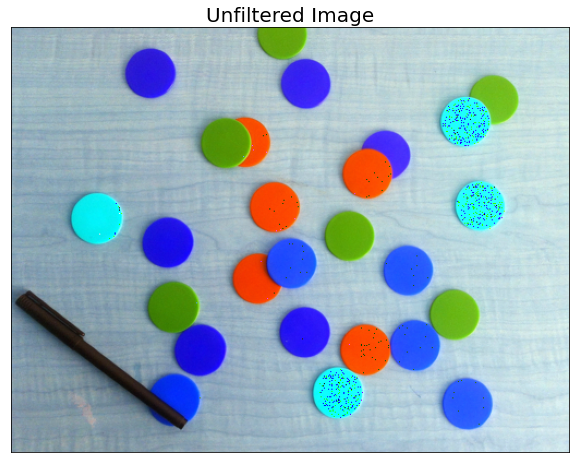

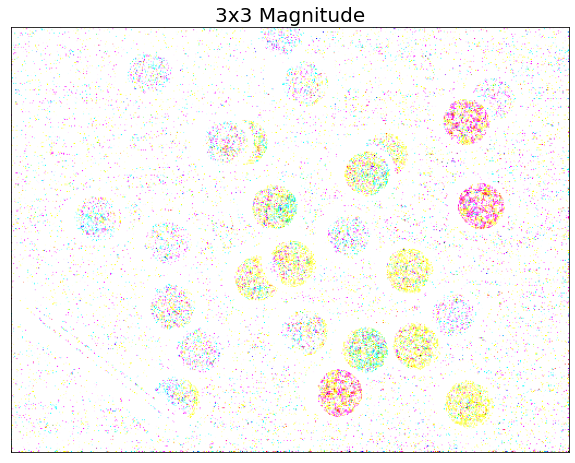

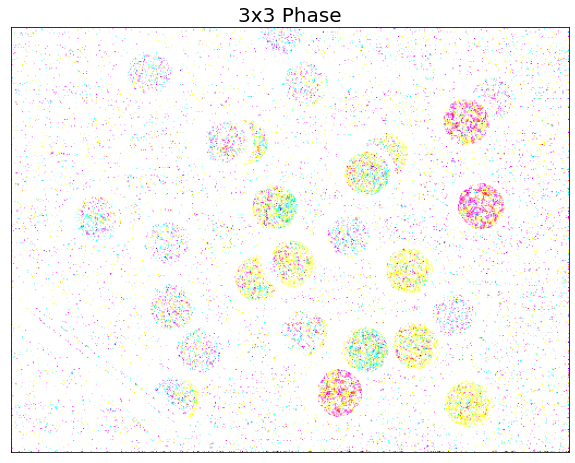

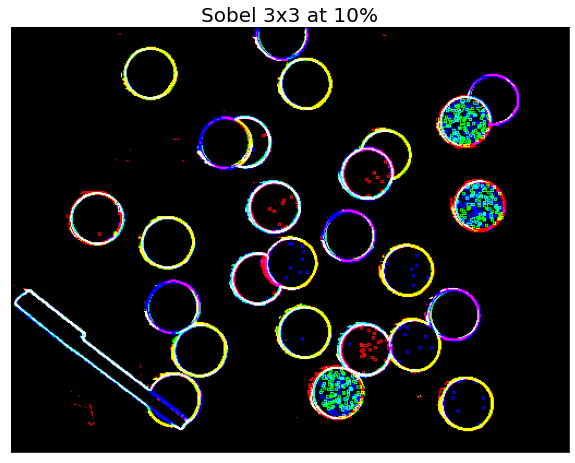

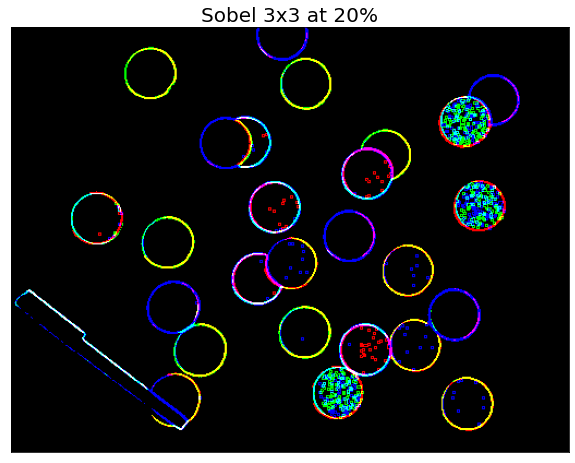

In [11]:
img_path= drive_path+'images/Circles_gauss.png'
base_img = cv2.imread(img_path)


img_dim = np.shape(base_img)


#3x3 Sobel Edge Detector 
#Operate in the X direction
sobel3by3_1 = cv2.Sobel(base_img,cv2.CV_64F,1,0,ksize=3)
#Operate in the Y direction 
sobel3by3_2 = cv2.Sobel(base_img,cv2.CV_64F,0,1,ksize=3)
#Empty matrix repesenting the image 
sobel3by3 = np.zeros(img_dim)
cv2.magnitude(sobel3by3_1,sobel3by3_2,sobel3by3)

img_mag3by3 = cv2.magnitude(sobel3by3_1,sobel3by3_2)
img_mag3by3 = img_mag3by3/img_mag3by3.max() *255
img_phase3by3 = cv2.phase(sobel3by3_1,sobel3by3_2)


mag_10 = 0.1*np.amax(sobel3by3)
mag_20 = mag_10*2 

ret,sobel3by3_mag_10 = cv2.threshold(sobel3by3,mag_10,255,cv2.THRESH_BINARY)
ret,sobel3by3_mag_20 = cv2.threshold(sobel3by3,mag_20,255,cv2.THRESH_BINARY)

display_img(base_img , 'Unfiltered Image')
display_img(img_mag3by3,'3x3 Magnitude')
display_img(img_mag3by3,'3x3 Phase')
display_img(sobel3by3_mag_10, 'Sobel 3x3 at 10%')
display_img(sobel3by3_mag_20, 'Sobel 3x3 at 20%')

*   Denoise the image with a 3x3 box filter and then apply the same Sobel
edge detector, with the same values of the thresholds, from the previous
question. Display original and filtered image side by side. Display phase,
magnitude, and thresholded images for different thresholds.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


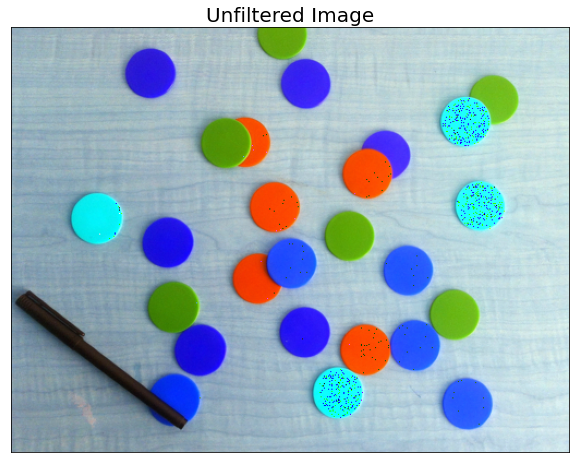

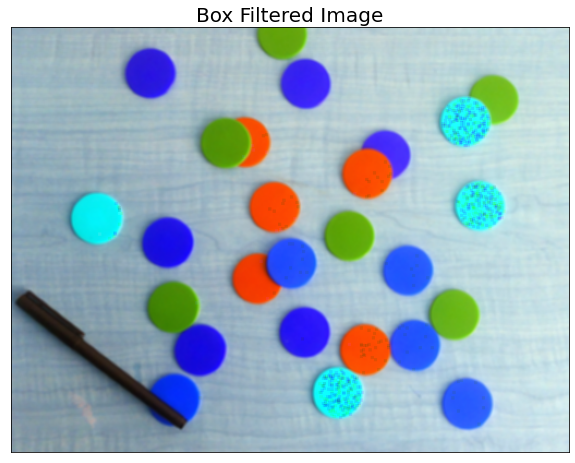

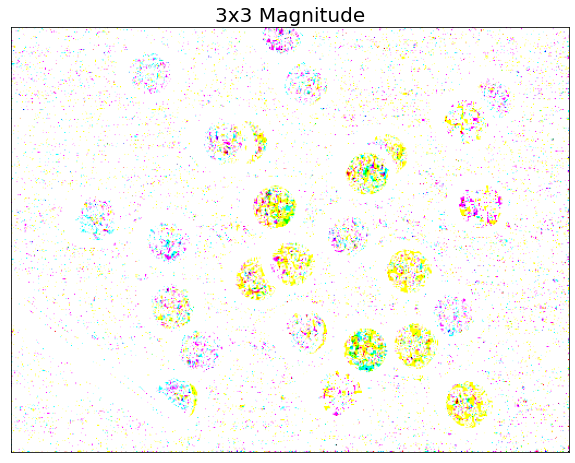

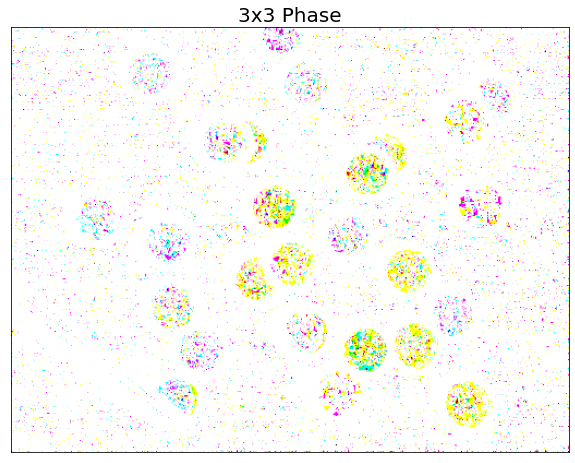

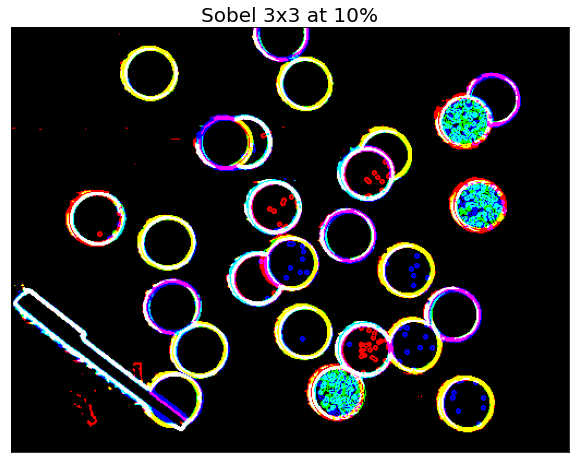

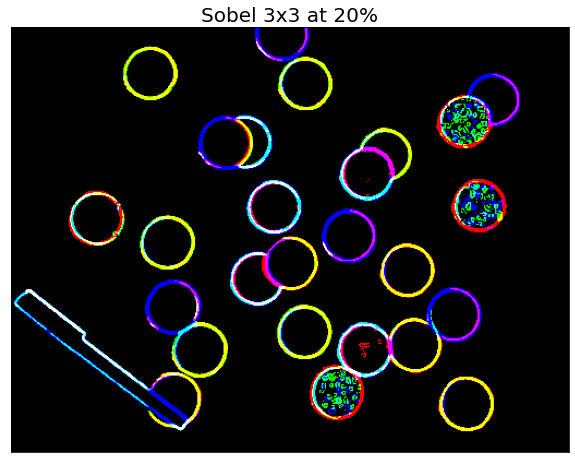

In [12]:
kernel = np.ones((3,3), np.float32)
kernel /= 9 

img_path= drive_path+'images/Circles_gauss.png'
base_img = cv2.imread(img_path)

filtered_img = cv2.filter2D(base_img,-1, kernel)

img_dim = np.shape(filtered_img)


#3x3 Sobel Edge Detector 
#Operate in the X direction
sobel3by3_1 = cv2.Sobel(filtered_img,cv2.CV_64F,1,0,ksize=3)
#Operate in the Y direction 
sobel3by3_2 = cv2.Sobel(filtered_img,cv2.CV_64F,0,1,ksize=3)
#Empty matrix repesenting the image 
sobel3by3 = np.zeros(img_dim)
cv2.magnitude(sobel3by3_1,sobel3by3_2,sobel3by3)

img_mag3by3 = cv2.magnitude(sobel3by3_1,sobel3by3_2)
img_mag3by3 = img_mag3by3/img_mag3by3.max() *255
img_phase3by3 = cv2.phase(sobel3by3_1,sobel3by3_2)

mag_10 = 0.1*np.amax(sobel3by3)
mag_20 = mag_10*2 

ret,sobel3by3_mag_10 = cv2.threshold(sobel3by3,mag_10,255,cv2.THRESH_BINARY)
ret,sobel3by3_mag_20 = cv2.threshold(sobel3by3,mag_20,255,cv2.THRESH_BINARY)

display_img(base_img , 'Unfiltered Image')
display_img(filtered_img, 'Box Filtered Image')
display_img(img_mag3by3,'3x3 Magnitude')
display_img(img_mag3by3,'3x3 Phase')
display_img(sobel3by3_mag_10, 'Sobel 3x3 at 10%')
display_img(sobel3by3_mag_20, 'Sobel 3x3 at 20%')


*   Comment on the effectiveness of using denoising prior to edge detection.

>If you compare the image results from the above code segment and the images used previously that did not use a box filter, the denoised images resulted in more accurate edge detection. Noise heavily affects the gradient that Sobel relies on to detect edges, and by using a box filter to reduce the amount of noise, the Sobel has improved edge detection compared to runnning an unfiltered input.